## Final Model

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, TunedThresholdClassifierCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib as plt

In [2]:
constructedData = pd.read_csv('../MAIN/Combining Data/combined_data.csv')

In [3]:
cols_rf = [colHeader for colHeader in list(constructedData.columns) 
            if (
               colHeader.startswith('distance') and 
               (colHeader not in ['distance_OLB', 'distance_DT', 'distance_ILB', 'distance_FS'])
            )
          ] + ['isDropback']
data_rf = constructedData[cols_rf].dropna()
X = data_rf.drop(['isDropback'], axis=1)
y = data_rf['isDropback']
XTrain_clf, XTest_clf, yTrain_clf, yTest_clf = train_test_split(X, y)

In [4]:
pipeline_randomForest= Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(class_weight='balanced', max_depth=12))
])
pipeline_randomForest.fit(XTrain_clf, yTrain_clf)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        max_depth=12))])

### Training Set Accuracy

Accuracy: 0.8547439821325171
              precision    recall  f1-score   support

       False       0.81      0.83      0.82      4778
        True       0.89      0.87      0.88      7311

    accuracy                           0.85     12089
   macro avg       0.85      0.85      0.85     12089
weighted avg       0.86      0.85      0.86     12089



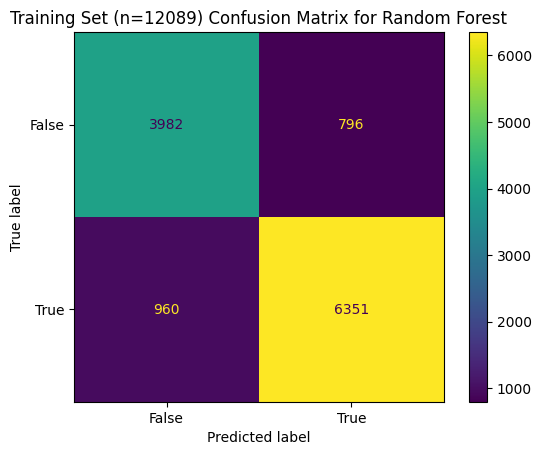

In [5]:
predicted_training_randomForest = pipeline_randomForest.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_randomForest)
plt.pyplot.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.pyplot.show()

### Test Set Accuracy

Test
Accuracy: 0.6813895781637717
              precision    recall  f1-score   support

       False       0.61      0.58      0.59      1610
        True       0.73      0.75      0.74      2420

    accuracy                           0.68      4030
   macro avg       0.67      0.66      0.67      4030
weighted avg       0.68      0.68      0.68      4030



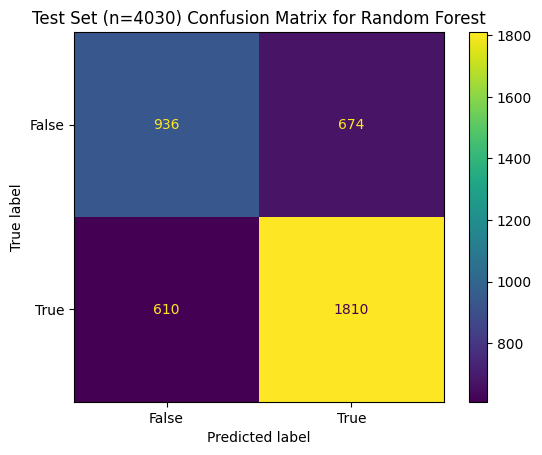

In [6]:
print('Test')
predicted_test_randomForest = pipeline_randomForest.predict(XTest_clf)
y_probs_rf = pipeline_randomForest.predict_proba(XTest_clf)[:, 1]
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_randomForest)}')
print(classification_report(yTest_clf, predicted_test_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_randomForest)
plt.pyplot.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Random Forest')
plt.pyplot.show()

### Cross-Validation Confirmation


In [ ]:
f1_weighted_tunedThresholdCV_rf = TunedThresholdClassifierCV(pipeline_randomForest, scoring='f1_weighted').fit(XTrain_clf, yTrain_clf)

In [ ]:
print(f1_weighted_tunedThresholdCV_rf.best_threshold_)

0.482362154089635


#### Training Accuracy

Accuracy: 0.850690710563322
              precision    recall  f1-score   support

       False       0.82      0.81      0.81      4816
        True       0.87      0.88      0.88      7273

    accuracy                           0.85     12089
   macro avg       0.84      0.84      0.84     12089
weighted avg       0.85      0.85      0.85     12089



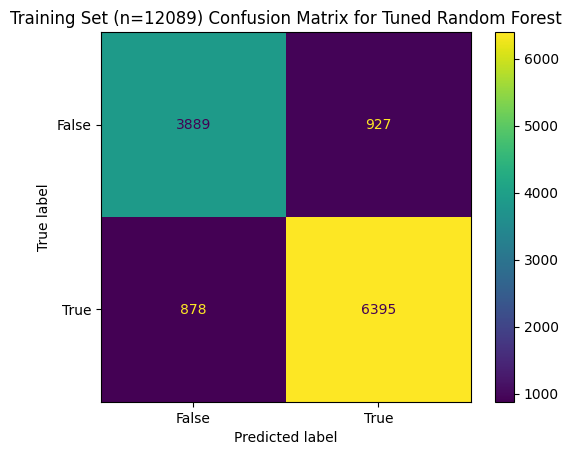

In [ ]:
predicted_training_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTrain_clf)
print(f'Accuracy: {metrics.accuracy_score(yTrain_clf, predicted_training_f1_weighted_randomForest)}')
print(classification_report(yTrain_clf, predicted_training_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTrain_clf, predicted_training_f1_weighted_randomForest)
plt.pyplot.title(f'Training Set (n={XTrain_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.pyplot.show()

#### Test Set Accuracy

Accuracy: 0.6933002481389579
              precision    recall  f1-score   support

       False       0.62      0.56      0.59      1572
        True       0.73      0.78      0.76      2458

    accuracy                           0.69      4030
   macro avg       0.68      0.67      0.67      4030
weighted avg       0.69      0.69      0.69      4030



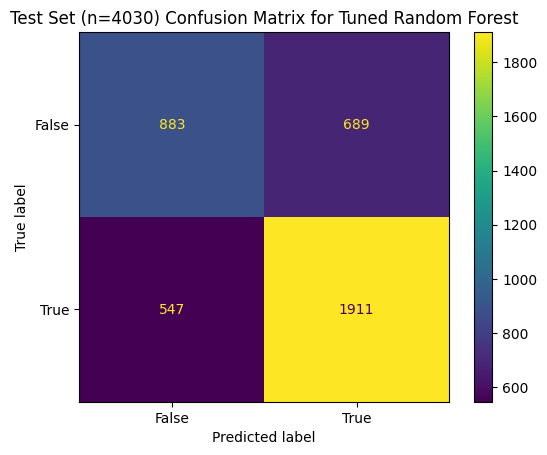

In [ ]:
predicted_test_f1_weighted_randomForest = f1_weighted_tunedThresholdCV_rf.predict(XTest_clf)
print(f'Accuracy: {metrics.accuracy_score(yTest_clf, predicted_test_f1_weighted_randomForest)}')
print(classification_report(yTest_clf, predicted_test_f1_weighted_randomForest))
metrics.ConfusionMatrixDisplay.from_predictions(yTest_clf, predicted_test_f1_weighted_randomForest)
plt.pyplot.title(f'Test Set (n={XTest_clf.shape[0]}) Confusion Matrix for Tuned Random Forest')
plt.pyplot.show()